In [8]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Using cached torch-2.0.1-cp39-cp39-win_amd64.whl (172.4 MB)
     ---------------------------------------- 5.7/5.7 MB 839.5 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 251.4 kB/s eta 0:00:00
     ------------------------------------ 536.2/536.2 KB 534.0 kB/s eta 0:00:00


In [21]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\user\AppData\Local\Temp\ipykernel_8172\297999661.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [22]:
torch.__version__

'2.0.1+cpu'

Data (preparing and loading)

In [26]:
#Create *known* parameters
weight = 0.7
bias   = 0.3

# Create data
start = 0
end   = 1
step  = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [27]:
len(X), len(y)

(50, 50)

## Splitting data into training and test sets

In [28]:
train_split = int(0.8 * len(X))

X_train, X_test, y_train, y_test = X[:train_split], X[train_split:], y[:train_split], y[train_split:]

In [29]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

## Data visualization

In [30]:
def plot_model_predictions(train_data   = X_train,
                           train_labels = y_train,
                           test_data    = X_test,
                           test_labels  = y_test,
                           predictions  = None):
    
    plt.figure(figsize=(5,3))
    
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label='Training data')
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label='Testing data')
    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label='Models predictions')
    
    plt.legend(prop={"size": 14})

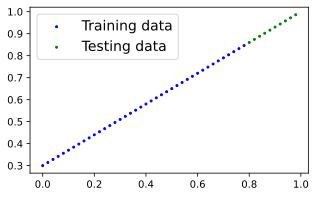

In [31]:
plot_model_predictions()

## Building linear regression model

In [32]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype         = torch.float))
        self.bias    = nn.Parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype         = torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x * self.weights + self.bias

In [33]:
#Create a random seed 
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [34]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making predictions without being trained

In [35]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [36]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

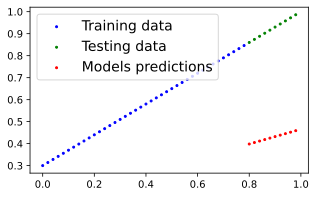

In [37]:
plot_model_predictions(predictions=y_preds)

## Training the model

In [38]:
#Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [39]:
# An epoch is one loop through the data
epochs = 100

# epoch_count = []
# loss_values = []
# test_loss_values = []

for epoch in range(epochs):
    
    model_0.train()
    
    y_preds = model_0(X_train)
    
    loss = loss_fn(y_preds, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()
    
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 10 == 0:    
        print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [40]:
with torch.inference_mode():
    test_preds = model_0(X_test)

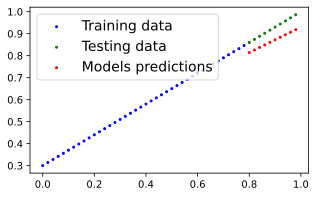

In [41]:
plot_model_predictions(predictions=test_preds)